<h1> experiment ideas : </h1>
<h3>
    <ol>
        <li> you saw that KNN is able to match similarities in orientation as well , which is not technically a class-specific descriptor. Now isolate class specific information, and intra-class differentiators like orientation information. 
        </li>
    </ol>    
</h3>

# YOLO EMBEDDINGS NEAREST NEIGHBOURS

cuda
class name : sofa
source path : /app/data/images/embedding_tester/image_1.jpg
object_ind : 0
class name : sofa
source path : /app/data/images/embedding_tester/image_18.jpg
object_ind : 24
class name : sofa
source path : /app/data/images/embedding_tester/image_103.jpg
object_ind : 8
class name : sofa
source path : /app/data/images/embedding_tester/image_22.jpg
object_ind : 33
class name : person
source path : /app/data/images/embedding_tester/image_1.jpg
object_ind : 1
class name : sofa
source path : /app/data/images/embedding_tester/image_100.jpg
object_ind : 3
class name : chair
source path : /app/data/images/embedding_tester/image_14.jpg
object_ind : 15
class name : chair
source path : /app/data/images/embedding_tester/image_17.jpg
object_ind : 21
class name : diningtable
source path : /app/data/images/embedding_tester/image_10.jpg
object_ind : 2
class name : sofa
source path : /app/data/images/embedding_tester/image_14.jpg
object_ind : 14
class name : chair
source path : /app/d

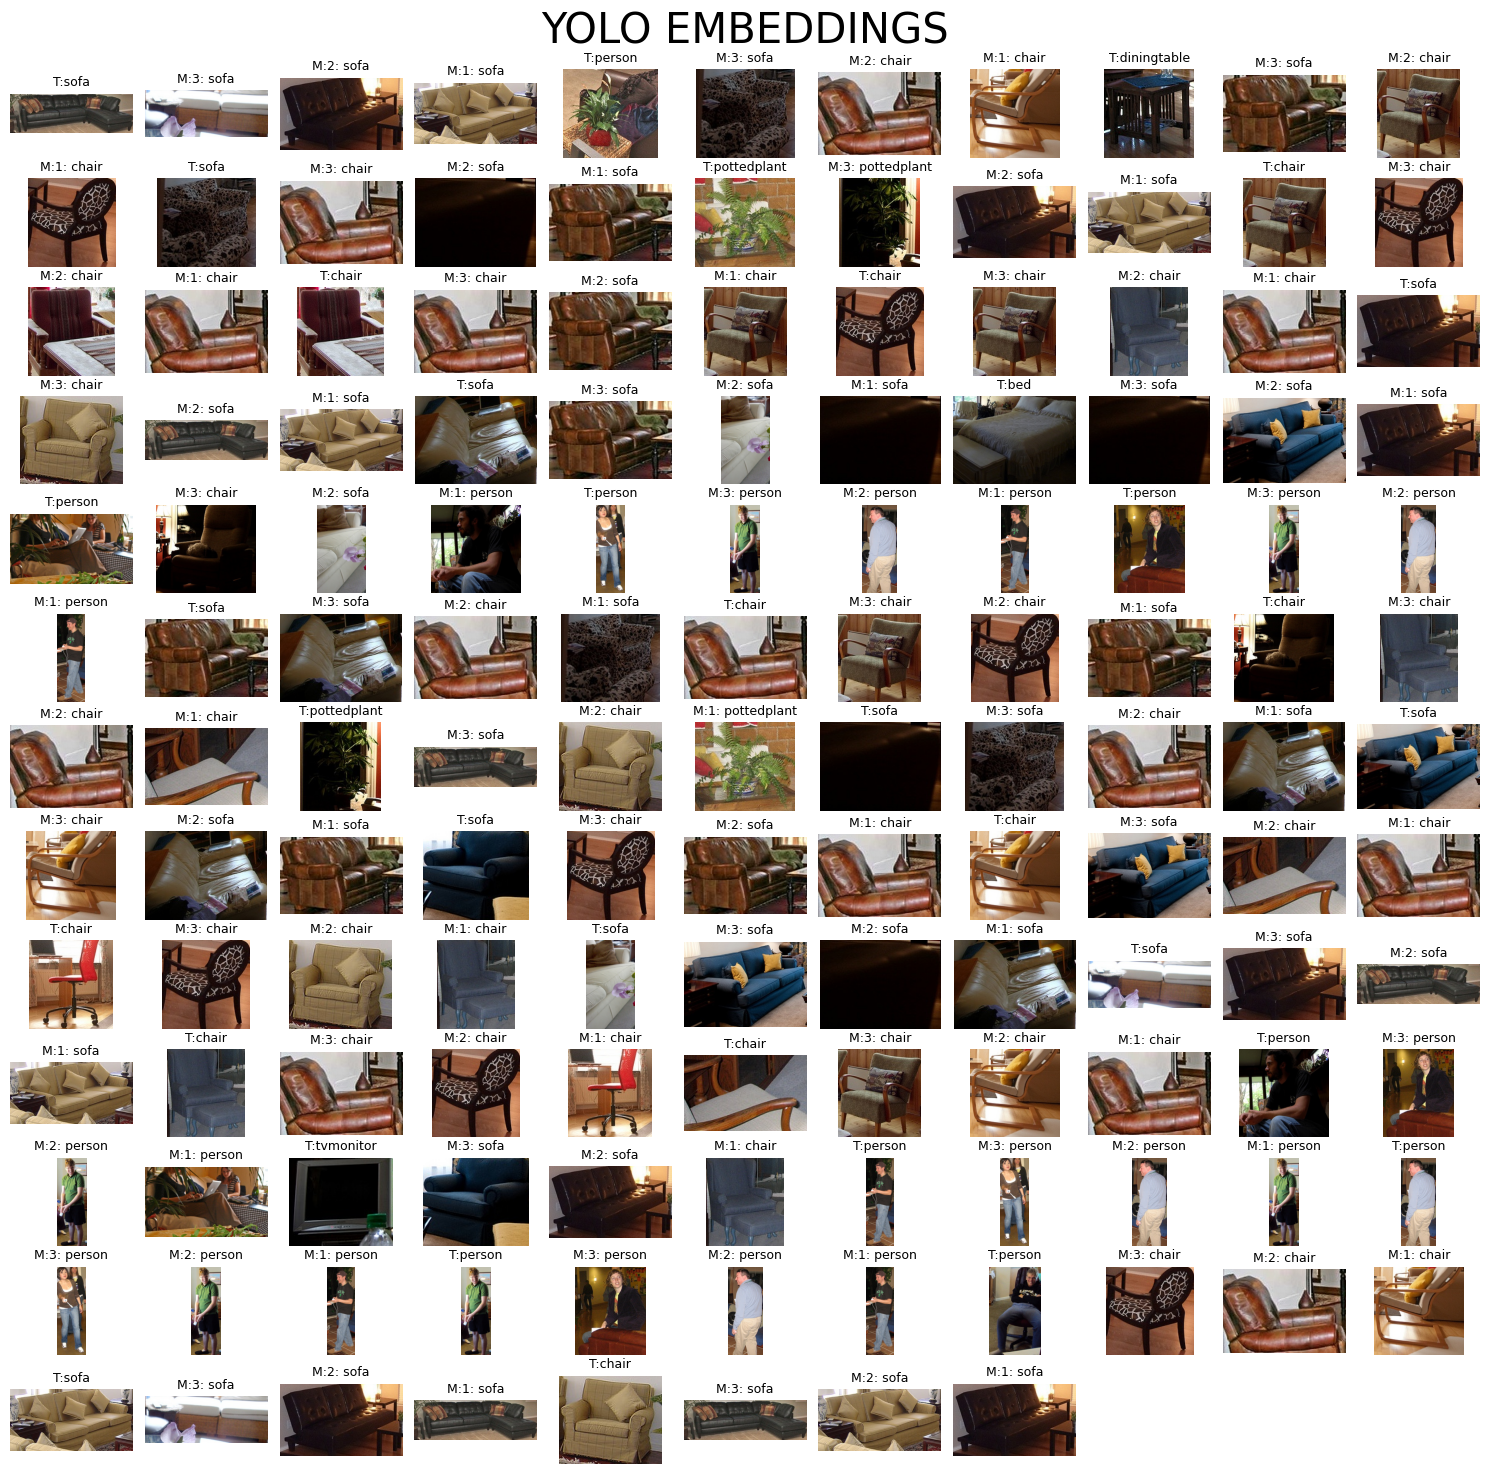

In [6]:
import os
import uuid
import numpy as np
import torch
import cv2
from typing import List
import matplotlib.pyplot as plt
import sys

from utils.data_utils import load_object_from_file
from utils.viz_utils import concise_ims_and_plots, plot_neighbours
from utils.distance_utils import get_k_nearest


def include_utils():
    parent_directory = os.path.abspath('/app/utils')
    sys.path.append(parent_directory)

include_utils()

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)


results_path = "/app/bin/results/"


# embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_2f6dd8bd6b585368b23d5b7e6e065772_yolo.pkl"))
# embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_2f6dd8bd6b585368b23d5b7e6e065772_yolo.pkl"))

#few
# embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_95f788e548755890a7ddd28135ac37e2_yolo_numims_5_embwin_3.pkl"))
# embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_95f788e548755890a7ddd28135ac37e2_yolo_numims_5_embwin_3.pkl"))


# #many
embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_36bd30c588fb5e76bec069b8d0059100_yolo_numims_20_embwin_3.pkl"))
embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_36bd30c588fb5e76bec069b8d0059100_yolo_numims_20_embwin_3.pkl"))

neighbours_inds = get_k_nearest(embedding_matrix, embedding_details["class_names"], 3)

plot_neighbours(embedding_details, neighbours_inds, masks_available = False, title = 'YOLO EMBEDDINGS')

# RESNET EMBEDDINGS

cuda
../bin/model_files/groundingdino_swint_ogc.pth  exists
../GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py  exists
../bin/model_files/sam_vit_h_4b8939.pth  exists


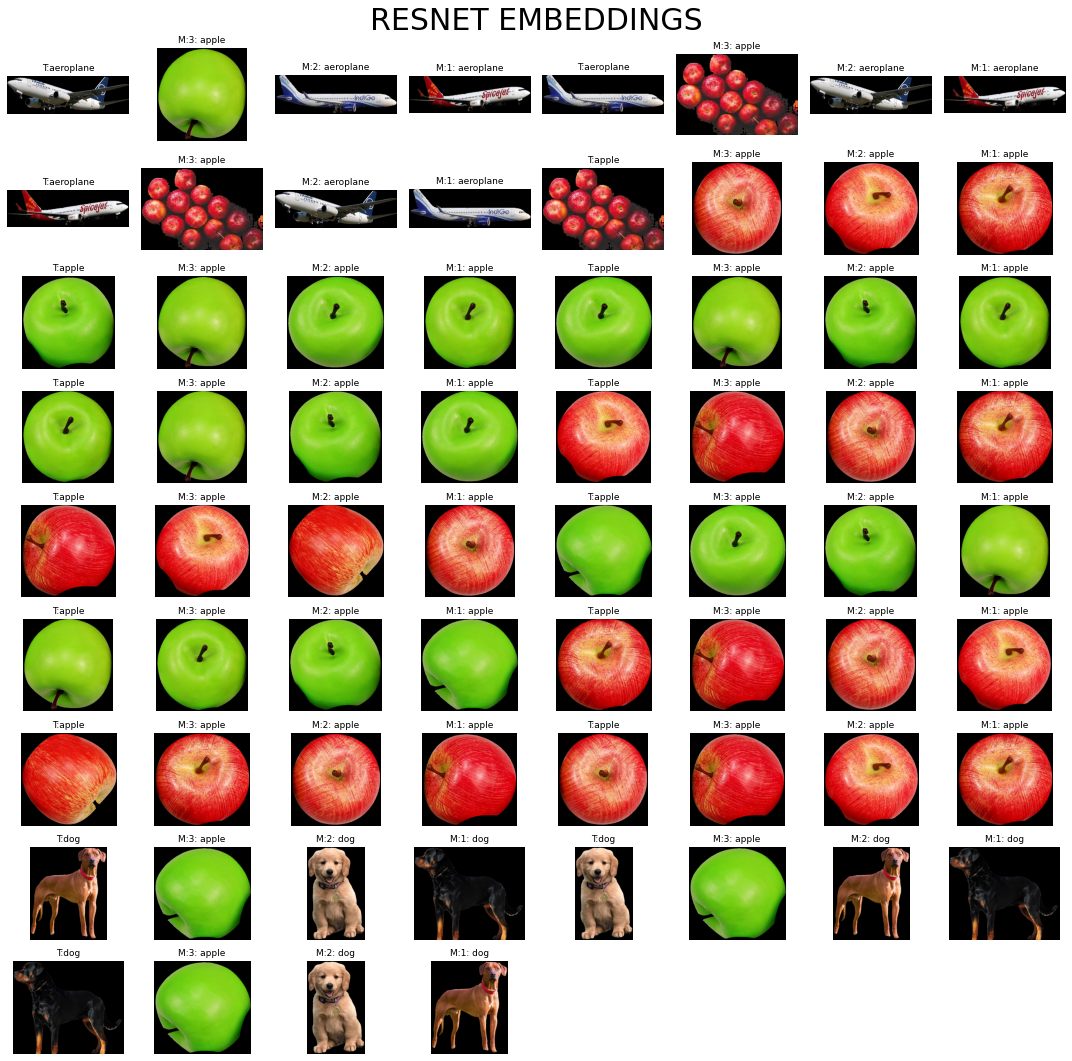

In [11]:
import torch
import os
import cv2
import supervision as sv
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import uuid
import cv2
import sys

from utils.data_utils import load_object_from_file
from utils.viz_utils import concise_ims_and_plots, plot_neighbours
from utils.distance_utils import get_k_nearest


from utils.gdsr_utils import check_model_paths


from groundingdino.util.inference import Model

def include_utils():
    parent_directory = os.path.abspath('/app/utils')
    sys.path.append(parent_directory)

include_utils()

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

check_model_paths()


results_path = "/app/bin/results/"


embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_bf0a8f0be08854a59dccf7b0ba0bb93f_gdsr.pkl"))
embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_bf0a8f0be08854a59dccf7b0ba0bb93f_gdsr.pkl"))

neighbours_inds = get_k_nearest(embedding_matrix, embedding_details["class_names"], 3)

plot_neighbours(embedding_details, neighbours_inds, masks_available = True, title = 'RESNET EMBEDDINGS')



In [2]:
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
# from datasets import load_dataset

# dataset = load_dataset("huggingface/cats-image")
# image = dataset["test"]["image"][0]

processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

#DONT MIND THE ERROR BELOW, I LOADED THE MODEL AND RAN THE BELOW CODE, TO GET SEE THE RESNET LABELS. (AEROPLANE / DOG / APPLE) ARE THE CLASS PROMPTS,
#RESNET HAS ITS OWN CLASSES FROM THE IMAGENET SET


ModuleNotFoundError: No module named 'transformers'

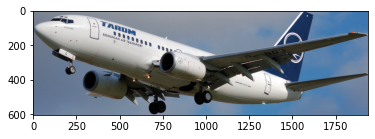


PREDICTED CLASS : airliner



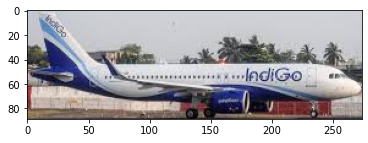


PREDICTED CLASS : airliner



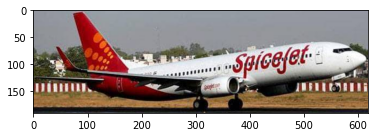


PREDICTED CLASS : airliner



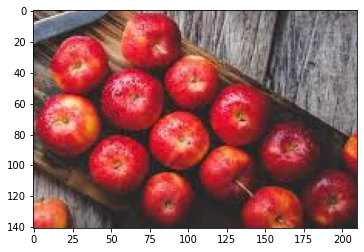


PREDICTED CLASS : Granny Smith



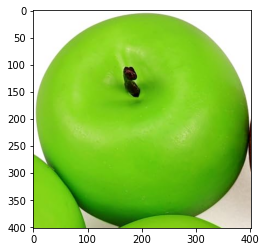


PREDICTED CLASS : candle, taper, wax light



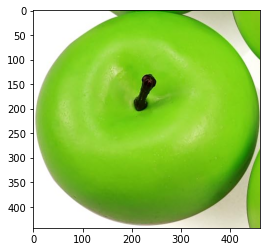


PREDICTED CLASS : plunger, plumber's helper



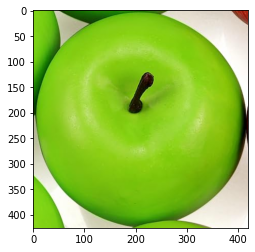


PREDICTED CLASS : plunger, plumber's helper



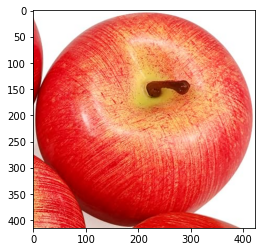


PREDICTED CLASS : Granny Smith



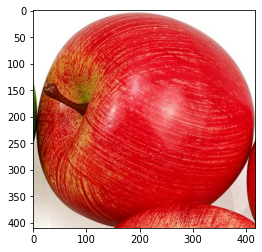


PREDICTED CLASS : snail



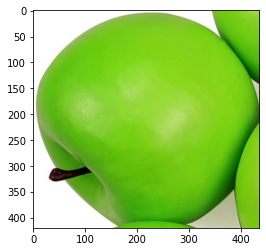


PREDICTED CLASS : crash helmet



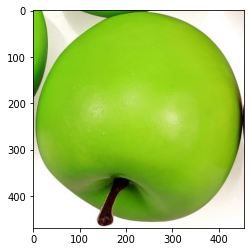


PREDICTED CLASS : balloon



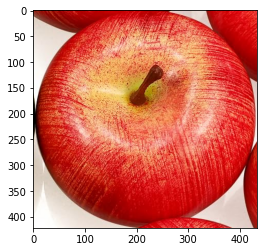


PREDICTED CLASS : Granny Smith



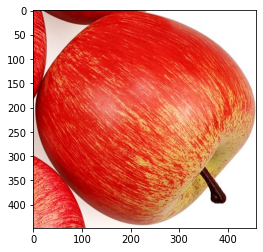


PREDICTED CLASS : reel



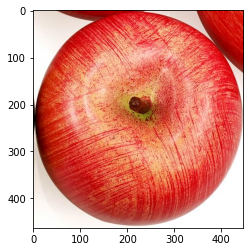


PREDICTED CLASS : Granny Smith



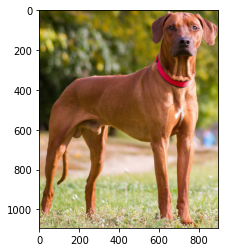


PREDICTED CLASS : Rhodesian ridgeback



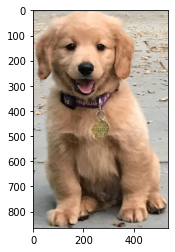


PREDICTED CLASS : kuvasz



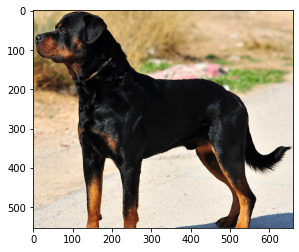


PREDICTED CLASS : Labrador retriever



In [10]:
from IPython.display import Image as im 
from IPython.display import display as dis 



with torch.no_grad():
    for i in range(len(embedding_details['class_names'])):
        img = cv2.imread(embedding_details['source_paths'][i])
        ymin, xmin, ymax, xmax = embedding_details['bounding_boxes'][i][0].astype(int)
        crop = img[xmin:xmax, ymin:ymax, :]

        plt.imshow(crop[:, :, ::-1])
        plt.show()
        
        #   RESNET PREDICTION 
        inputs = processor(crop, return_tensors="pt")
        logits = model(**inputs).logits
        predicted_label = logits.argmax(-1).item()
        print(f"\nPREDICTED CLASS : {model.config.id2label[predicted_label]}\n")


In [8]:
embedding_details['bounding_boxes'][i]

array([[  77.18927,  386.13437, 2014.6267 ,  989.6334 ]], dtype=float32)

# insights
<ol>
    <li> <b> embeddings capture similarities and differences within samples of a single class</b> : When we a train a neural network on a classification task, like the model used for extracting embeddings here : Resnet 50, we expect that the final layer capture features that only differentiate different classes, i.e, what defines an apple, and more specifically, what differentiates an apple from the other classes on which the model was trained. <br><br>BUT, <b> we see that the model is able to tell the similarity between orientations of an almost identical sample of the same class as well.</b><br><br> For instance , in the first target of the 3rd row, we see that the staw is roughly in the middle of the apple, pointing north-east, and we find the closest 2 matches to be in similar orientations as well, whereas an instance where the stalk is at the bottom left position is considered to be more distant.</li>
    
       

<hr><hr>
<h1> localization embedding analysis </h1>
<h2> experiment framework </h1>
<ol>
    <li>Select an image, where the yolo predicts an object that is clearly visible with high confidence</li>
    <li>segment the obj and store the segmentation mask</li><br><br>
    <ol>
        <li> <h3>Scale analysis</h3>
            <ul>
                <li>paste scaled up and scaled down versions of the same object, in the same location, such that the center of the bounding box is not changed, as different images with black backgrounds. Compare the difference (which parts if any distinct parts differ) in the embeddings.</li>
                <li> find high confidence object with almost identical bounding boxes, place them in the same spatial location in differnet images with black background, and find which parts of the embedding remain similar, these parts correspond to the location information. (you may need to find the similarity among many such examples.)</li>
            </ul>
        </li><br>
        <li> <h3>location Analysis</h3> 
            <ul>
                <li> Take the original mask, and translate it to different parts of the same image with a black background. The final image should have the same object in identical scale, simply translating these duplicates far away parts of the image.</li>
                </li>
                <li>apply yolo on this image, and compare the embeddings of each instance and check what changes, the change should directly correspond to location information. (This probaly has to be done for many images corresponding to different objects ,to get a better idea, of where in the embedding, and how location information is encoded.)</li>
            </ul>
        </li>



